![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2F02+-+Vertex+AI+AutoML&file=02d+-+Vertex+AI+AutoML+-+Tabular+Workflows+-+TabNet.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/02%20-%20Vertex%20AI%20AutoML/02d%20-%20Vertex%20AI%20AutoML%20-%20Tabular%20Workflows%20-%20TabNet.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2F02%2520-%2520Vertex%2520AI%2520AutoML%2F02d%2520-%2520Vertex%2520AI%2520AutoML%2520-%2520Tabular%2520Workflows%2520-%2520TabNet.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/02%20-%20Vertex%20AI%20AutoML/02d%20-%20Vertex%20AI%20AutoML%20-%20Tabular%20Workflows%20-%20TabNet.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/02%20-%20Vertex%20AI%20AutoML/02d%20-%20Vertex%20AI%20AutoML%20-%20Tabular%20Workflows%20-%20TabNet.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# 02d - Vertex AI AutoML - Tabular Workflows - TabNet

---

**WORKING - Needs Documentation**

[TabNet: Attentive Interpretable Tabular Learning](https://arxiv.org/abs/1908.07442)
[Attention Is All You Need](https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf)

[Vertex AI AutoML Tabular Workflows for TabNet](https://cloud.google.com/vertex-ai/docs/tabular-data/tabular-workflows/tabnet)
- [Interpret Predictions](https://cloud.google.com/vertex-ai/docs/tabular-data/tabular-workflows/tabnet-online-predictions#interpret_prediction_results)
- [Data Type Casting Issue](b/259783892)


Vertex SDK
Vertex AI
Vertex AI Pipelines
Vertex AI Pipelines Prebuilt components


- Run in Vertex AI as Pipeline Job:
    - [get_tabnet_trainer_pipeline_and_parameters](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.23/google_cloud_pipeline_components.experimental.automl.tabular.html#google_cloud_pipeline_components.experimental.automl.tabular.utils.get_tabnet_trainer_pipeline_and_parameters)
    - [get_tabnet_hyperparameter_tuning_job_pipeline_and_parameters](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.23/google_cloud_pipeline_components.experimental.automl.tabular.html#google_cloud_pipeline_components.experimental.automl.tabular.utils.get_tabnet_hyperparameter_tuning_job_pipeline_and_parameters)
        - [get_tabnet_study_spec_parameters_override](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.23/google_cloud_pipeline_components.experimental.automl.tabular.html#google_cloud_pipeline_components.experimental.automl.tabular.utils.get_tabnet_study_spec_parameters_override)
- Run as Component in Vertex AI Pipeline:
    - [TabNetTrainerOp](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.23/google_cloud_pipeline_components.experimental.automl.tabular.html#google_cloud_pipeline_components.experimental.automl.tabular.TabNetTrainerOp)
    - [TabNetHyperparameterTuningJobOp](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.23/google_cloud_pipeline_components.experimental.automl.tabular.html#google_cloud_pipeline_components.experimental.automl.tabular.TabNetHyperparameterTuningJobOp)

---

**Prerequisites:**
- [01 - BigQuery - Table Data Source](../01%20-%20Data%20Sources/01%20-%20BigQuery%20-%20Table%20Data%20Source.ipynb)


---
## Setup

### Package Installs (if needed)

This notebook uses the Python Clients for
- Google Service Usage
    - to enable APIs (Dataflow)

The cells below check to see if the required Python libraries are installed.  If any are not it will print a message to do the install with the associated pip command to use.  These installs must be completed before continuing this notebook.

In [19]:
try:
    import google.cloud.service_usage_v1
except ImportError:
    print('You need to pip install google-cloud-service-usage')
    !pip install google-cloud-service-usage -q

### Environment

inputs:

In [1]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [117]:
REGION = 'us-central1'
EXPERIMENT = '02d'
SERIES = '02'

# source data
BQ_PROJECT = PROJECT_ID
BQ_DATASET = 'fraud'
BQ_TABLE = 'fraud_prepped'

# Resources
DEPLOY_COMPUTE = 'n1-standard-4'

# Model Training
VAR_TARGET = 'Class'
VAR_OMIT = 'transaction_id' # add more variables to the string with space delimiters

packages:

In [569]:
from google.cloud import aiplatform
from google.cloud import storage
from google.cloud import bigquery
from google.cloud import service_usage_v1

from datetime import datetime
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn import metrics

from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value

from google_cloud_pipeline_components.experimental.automl.tabular import utils as automl_tabular_utils

clients:

In [21]:
aiplatform.init(project=PROJECT_ID, location=REGION)
bq = bigquery.Client()
gcs = storage.Client()
su_client = service_usage_v1.ServiceUsageClient()

parameters:

In [22]:
TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")
BUCKET = PROJECT_ID
URI = f"gs://{BUCKET}/{SERIES}/{EXPERIMENT}"
DIR = f"temp/{EXPERIMENT}"

In [23]:
SERVICE_ACCOUNT = !gcloud config list --format='value(core.account)' 
SERVICE_ACCOUNT = SERVICE_ACCOUNT[0]
SERVICE_ACCOUNT

'1026793852137-compute@developer.gserviceaccount.com'

List the service accounts current roles:

In [24]:
!gcloud projects get-iam-policy $PROJECT_ID --filter="bindings.members:$SERVICE_ACCOUNT" --format='table(bindings.role)' --flatten="bindings[].members"

ROLE
roles/bigquery.admin
roles/owner
roles/run.admin
roles/storage.objectAdmin


>Note: If the resulting list is missing [roles/storage.objectAdmin](https://cloud.google.com/storage/docs/access-control/iam-roles) then [revisit the setup notebook](../00%20-%20Setup/00%20-%20Environment%20Setup.ipynb#permissions) and add this permission to the service account with the provided instructions.

environment:

In [25]:
!rm -rf {DIR}
!mkdir -p {DIR}

Experiment Tracking:

In [82]:
FRAMEWORK = 'tabnet'
TASK = 'classification'
MODEL_TYPE = 'dnn'
EXPERIMENT_NAME = f'experiment-{SERIES}-{EXPERIMENT}-{FRAMEWORK}-{TASK}-{MODEL_TYPE}'
RUN_NAME = f'run-{TIMESTAMP}'

### Enable APIs

Using Dataflow requires enabling these APIs for the Google Cloud Project.

Options for enabeling these.  In this notebook option 2 is used.
 1. Use the APIs & Services page in the console: https://console.cloud.google.com/apis
     - `+ Enable APIs and Services`
     - Search for Dataflow
 2. Use [Google Service Usage](https://cloud.google.com/service-usage/docs) API from Python
     - [Python Client For Service Usage](https://github.com/googleapis/python-service-usage)
     - [Python Client Library Documentation](https://cloud.google.com/python/docs/reference/serviceusage/latest)
     
The following code cells use the Service Usage Client to:
- get the state of the service
- if 'DISABLED':
    - Try enabling the service and return the state after trying
- if 'ENABLED' print the state for confirmation

#### Dataflow

In [26]:
dataflow = su_client.get_service(
    request = service_usage_v1.GetServiceRequest(
        name = f'projects/{PROJECT_ID}/services/dataflow.googleapis.com'
    )
).state.name


if dataflow == 'DISABLED':
    print(f'Dataflow is currently {dataflow} for project: {PROJECT_ID}')
    print(f'Trying to Enable...')
    operation = su_client.enable_service(
        request = service_usage_v1.EnableServiceRequest(
            name = f'projects/{PROJECT_ID}/services/dataflow.googleapis.com'
        )
    )
    response = operation.result()
    if response.service.state.name == 'ENABLED':
        print(f'Dataflow is now enabled for project: {PROJECT_ID}')
    else:
        print(response)
else:
    print(f'Dataflow already enabled for project: {PROJECT_ID}')

Dataflow is currently DISABLED for project: statmike-mlops-349915
Trying to Enable...
Dataflow is now enabled for project: statmike-mlops-349915


---
## TabNet Trainer - With Hyperparmeter Tuning

Get the column information (schema) for the training data:

In [27]:
query = f"""
SELECT *
FROM {BQ_PROJECT}.{BQ_DATASET}.INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = '{BQ_TABLE}'
"""
schema = bq.query(query = query).to_dataframe()

Make a list of features from the table schema - omit the target variable (`VAR_TARGET`) and other variables that are not part of the model training:

In [28]:
features = schema[~schema.column_name.isin([VAR_OMIT] + [VAR_TARGET] + ['splits'])].column_name.tolist()

Create a feature transformation configuration.  This example uses `auto_transforms` for all features but many custom options are avialable.

In [29]:
transform_config = {"auto_transforms": features}

Save the transform_config the the bucket path for this pipeline:

In [30]:
pipeline_job_root_dir = f'{URI}/pipelines/{TIMESTAMP}'
bucket = gcs.lookup_bucket(PROJECT_ID)
blob = bucket.blob(pipeline_job_root_dir.split(f'gs://{PROJECT_ID}/')[1] + f'/transform_config.json')
blob.upload_from_string(json.dumps(transform_config))

Use the pre-built component [get_tabnet_hyperparamter_tuning_job_pipeline_and_parameters()](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.23/google_cloud_pipeline_components.experimental.automl.tabular.html#google_cloud_pipeline_components.experimental.automl.tabular.utils.get_tabnet_hyperparameter_tuning_job_pipeline_and_parameters) to create a pipeline template and set parameter values for hyperparamter tuning.

In [ ]:
(template_path, parameter_values) = automl_tabular_utils.get_tabnet_hyperparameter_tuning_job_pipeline_and_parameters(
    project = PROJECT_ID,
    location = REGION,
    target_column = VAR_TARGET,
    prediction_type = 'classification',
    root_dir = pipeline_job_root_dir,
    transform_config = pipeline_job_root_dir + f'/transform_config.json',
    data_source_bigquery_table_path = f'bq://{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}',
    predefined_split_key = 'splits',
    study_spec_metric_id = 'loss',
    study_spec_metric_goal = 'MINIMIZE',
    study_spec_parameters_override = automl_tabular_utils.get_tabnet_study_spec_parameters_override(
        dataset_size_bucket = "small",
        prediction_type = 'classification',
        training_budget_bucket = "small",
    ),
    study_spec_algorithm = 'ALGORITHM_UNSPECIFIED', # VIZIER
    study_spec_measurement_selection_type = 'BEST_MEASUREMENT',
    max_trial_count = 200,
    parallel_trial_count = 10,
    max_failed_trial_count = 10,
    worker_pool_specs_override = [{'machine_spec': {'machine_type': 'n1-standard-8'}, }],
    run_evaluation = True,
)

Create a Vertex AI Pipeline Job:

In [32]:
pipeline_job = aiplatform.PipelineJob(
    display_name = EXPERIMENT,
    job_id = f'series-{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    pipeline_root = pipeline_job_root_dir,
    template_path = template_path,
    parameter_values = parameter_values,
    enable_caching = False,
)

Run the Vertex AI Pipeline Job:

In [ ]:
pipeline_job.run(
    sync = True
)

Creating PipelineJob
PipelineJob created. Resource name: projects/1026793852137/locations/us-central1/pipelineJobs/series-02-02d-20221115172949
To use this PipelineJob in another session:
pipeline_job = aiplatform.PipelineJob.get('projects/1026793852137/locations/us-central1/pipelineJobs/series-02-02d-20221115172949')
View Pipeline Job:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/series-02-02d-20221115172949?project=1026793852137
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/series-02-02d-20221115172949 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/series-02-02d-20221115172949 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/series-02-02d-20221115172949 current state:
PipelineState.PIPELINE_STATE_RUNNING
PipelineJob projects/1026793852137/locations/us-central1/pipelineJobs/series-

### Review the Pipeline in the Console

<p align="center">
  <img alt="TabNet Pipeline" src="../architectures/notebooks/02/tabnet_pipeline.png" width="45%">
&nbsp; &nbsp; &nbsp; &nbsp;
  <img alt="TabNet Pipeline Expanded" src="../architectures/notebooks/02/tabnet_pipeline_detail.png" width="45%">
</p>  

In [157]:
print(f'Review the Pipeline Job In the Console:\nhttps://console.cloud.google.com/vertex-ai/locations/{REGION}/pipelines/runs/{pipeline_job.job_id}?project={PROJECT_ID}')

Review the Pipeline Job In the Console:
https://console.cloud.google.com/vertex-ai/locations/us-central1/pipelines/runs/series-02-02d-20221115172949?project=statmike-mlops-349915


## Get Parameters From Best Trail

In [160]:
# If the job above was run then this pointer is already defined as pipeline_job:
pipeline = aiplatform.PipelineJob.get(resource_name = pipeline_job.job_id)

In [42]:
pipeline_details = pipeline.gca_resource.job_detail.task_details

In [47]:
for task in pipeline_details:
    if task.task_name == 'get-best-hyperparameter-tuning-job-trial':
        task_details = task

In [83]:
task_details

task_id: -5674096275591528448
task_name: "get-best-hyperparameter-tuning-job-trial"
create_time {
  seconds: 1668533543
  nanos: 297887000
}
start_time {
  seconds: 1668571719
  nanos: 693410000
}
end_time {
  seconds: 1668571761
  nanos: 256548000
}
executor_detail {
  container_detail {
    main_job: "projects/1026793852137/locations/us-central1/customJobs/5292279043096313856"
  }
}
state: SUCCEEDED
execution {
  name: "projects/1026793852137/locations/us-central1/metadataStores/default/executions/3186995672440538775"
  display_name: "get-best-hyperparameter-tuning-job-trial"
  state: COMPLETE
  etag: "1668571761227"
  create_time {
    seconds: 1668571719
    nanos: 247000000
  }
  update_time {
    seconds: 1668571761
    nanos: 227000000
  }
  schema_title: "system.ContainerExecution"
  schema_version: "0.0.1"
  metadata {
    fields {
      key: "input:gcp_resources"
      value {
        string_value: "{\"resources\":[{\"resourceType\":\"HyperparameterTuningJob\",\"resourceUri\"

In [50]:
task_details.outputs['unmanaged_container_model']

artifacts {
  name: "projects/1026793852137/locations/us-central1/metadataStores/default/artifacts/3593481980663021634"
  display_name: "unmanaged_container_model"
  uri: "gs://statmike-mlops-349915/02/02d/pipelines/20221115172949/6571834875286913024/5278658018173517824/train/trial_155/model"
  etag: "1668571761193"
  create_time {
    seconds: 1668571719
    nanos: 531000000
  }
  update_time {
    seconds: 1668571761
    nanos: 193000000
  }
  state: LIVE
  schema_title: "system.Artifact"
  schema_version: "0.0.1"
  metadata {
    fields {
      key: "containerSpec"
      value {
        struct_value {
          fields {
            key: "healthRoute"
            value {
              string_value: "/health"
            }
          }
          fields {
            key: "imageUri"
            value {
              string_value: "us-docker.pkg.dev/vertex-ai/automl-tabular/prediction-server:20221020_1325_RC00"
            }
          }
          fields {
            key: "predictRoute"


In [107]:
task_details.outputs['unmanaged_container_model'].artifacts[0].metadata['containerSpec']['imageUri']

'us-docker.pkg.dev/vertex-ai/automl-tabular/prediction-server:20221020_1325_RC00'

In [87]:
task_details.outputs['unmanaged_container_model'].artifacts[0].uri

'gs://statmike-mlops-349915/02/02d/pipelines/20221115172949/6571834875286913024/5278658018173517824/train/trial_155/model'

In [70]:
for md in task_details.execution.metadata:
    if md == 'input:gcp_resources':
        hpt_uri = json.loads(task_details.execution.metadata[md])['resources'][0]['resourceUri']
        hpt_jobid = hpt_uri.rsplit('/', 1)[1]

In [69]:
hpt_uri, hpt_jobid

('https://us-central1-aiplatform.googleapis.com/v1/projects/1026793852137/locations/us-central1/hyperparameterTuningJobs/8784187235424534528',
 '8784187235424534528')

In [75]:
tuningJob = aiplatform.HyperparameterTuningJob.get(hpt_jobid)

In [76]:
tuningJob.resource_name, tuningJob.display_name

('projects/1026793852137/locations/us-central1/hyperparameterTuningJobs/8784187235424534528',
 'tabnet-hyperparameter-tuning-job-6571834875286913024-5278658018173517824')

In [448]:
auprc = [1 - trial.final_measurement.metrics[0].value if trial.state.name == 'SUCCEEDED' else 0 for trial in tuningJob.trials]
print(auprc)

[0.8677037209272385, 0.8977457359433174, 0.9001611471176147, 0.8908845335245132, 0.915027841925621, 0.902820460498333, 0.8819985017180443, 0.9205226227641106, 0.8662902265787125, 0.9123073294758797, 0.8082566261291504, 0.9481976218521595, 0.9295452758669853, 0.9225355759263039, 0.9963639543857425, 0.9134967848658562, 0.9269111901521683, 0.9158775210380554, 0.9333544746041298, 0.9913488542661071, 0.9926850749179721, 0.9961234505753964, 0.9958049366250634, 0.9955801549367607, 0.9960433579981327, 0.9965664104092866, 0.9963713132310659, 0.9957402837462723, 0.9962091210763901, 0.995978101156652, 0.9955959049984813, 0.995867426507175, 0.995451639406383, 0.9957091896794736, 0.9961250720079988, 0.9960567271336913, 0.99637147388421, 0.9957201932556927, 0.9955389364622533, 0.996281556552276, 0.9849202241748571, 0.9953474551439285, 0.9963344179559499, 0.9962636115960777, 0.9965063377749175, 0.995743207167834, 0.9873314378783107, 0.994895467069, 0.9952561450190842, 0.9939971873536706, 0.9963339322

In [81]:
best = tuningJob.trials[auprc.index(max(auprc))]
best

id: "155"
state: SUCCEEDED
parameters {
  parameter_id: "alpha_focal_loss"
  value {
    number_value: 0.99
  }
}
parameters {
  parameter_id: "batch_momentum"
  value {
    number_value: 0.5
  }
}
parameters {
  parameter_id: "batch_size"
  value {
    number_value: 512.0
  }
}
parameters {
  parameter_id: "batch_size_ratio"
  value {
    number_value: 0.5
  }
}
parameters {
  parameter_id: "class_weight"
  value {
    number_value: 1.0
  }
}
parameters {
  parameter_id: "decay_every"
  value {
    number_value: 5000.0
  }
}
parameters {
  parameter_id: "decay_rate"
  value {
    number_value: 0.5
  }
}
parameters {
  parameter_id: "feature_dim"
  value {
    number_value: 200.0
  }
}
parameters {
  parameter_id: "feature_dim_ratio"
  value {
    number_value: 0.39029597890948337
  }
}
parameters {
  parameter_id: "gamma_focal_loss"
  value {
    number_value: 4.0
  }
}
parameters {
  parameter_id: "large_category_dim"
  value {
    number_value: 5.0
  }
}
parameters {
  parameter_id:

---
## TabNet Trainer
To train the model with fixed values of the hyperparameters run the [aiplatform.PipelineJob]() with the template created by the prebuilt component [get_tabnet_trainer_pipeline_and_parameters()](https://google-cloud-pipeline-components.readthedocs.io/en/google-cloud-pipeline-components-1.0.23/google_cloud_pipeline_components.experimental.automl.tabular.html#google_cloud_pipeline_components.experimental.automl.tabular.utils.get_tabnet_trainer_pipeline_and_parameters).  An example is provided below but not needed in this demonstration since it has been run as one of the trials in the hyperparmeter tuning run above:

**example**

```python
(template_path, parameter_values) = automl_tabular_utils.get_trainer_pipeline_and_parameters(
    project = PROJECT_ID,
    location = REGION,
    target_column = VAR_TARGET,
    prediction_type = 'classification',
    root_dir = pipeline_job_root_dir,
    transform_config = pipeline_job_root_dir + f'/transform_config.json',
    data_source_bigquery_table_path = f'bq://{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}',
    predefined_split_key = 'splits',
    # Remove Hyperparameter Tuning parameters:
    #study_spec_metric_id = 'loss',
    #study_spec_metric_goal = 'MINIMIZE',
    #study_spec_parameters_override = automl_tabular_utils.get_tabnet_study_spec_parameters_override(
    #    dataset_size_bucket = "small",
    #    prediction_type = 'classification',
    #    training_budget_bucket = "small",
    #),
    #study_spec_algorithm = 'ALGORITHM_UNSPECIFIED', # VIZIER
    #study_spec_measurement_selection_type = 'BEST_MEASUREMENT',
    #max_trial_count = 200,
    #parallel_trial_count = 10,
    #max_failed_trial_count = 10,
    ##########################################
    # Add trial parameters:
    alpha_focal_loss = ,
    batch_momentum = ,
    batch_size = ,
    batch_size_ratio = ,
    class_weight = ,
    decay_every = ,
    decay_rate = ,
    feature_dim = ,
    feature_dim_ratio = ,
    gamma_focal_loss = ,
    large_category_dim = ,
    large_category_thresh = ,
    learning_rate = ,
    loss_function_type = ,
    max_steps = ,
    max_train_secs = ,
    num_decision_steps = ,
    num_transformer_layers = ,
    num_transformer_layers_ratio = ,
    relaxation_factor = ,
    sparsity_loss_weight = ,
    #######################
    worker_pool_specs_override = [{'machine_spec': {'machine_type': 'n1-standard-8'}, }],
    run_evaluation = True,
)

pipeline_job = aiplatform.PipelineJob(
    display_name = EXPERIMENT,
    job_id = f'series-{SERIES}-{EXPERIMENT}-{TIMESTAMP}',
    pipeline_root = pipeline_job_root_dir,
    template_path = template_path,
    parameter_values = parameter_values,
    enable_caching = False,
)

pipeline_job.run(
    sync = True
)
```

---
## Retrieve Location Information For The Model From Best Trial


In [450]:
best.id

'155'

In [449]:
model_uri = task_details.outputs['unmanaged_container_model'].artifacts[0].uri.split('trial_')[0] + f'trial_{best.id}/model'
model_uri

'gs://statmike-mlops-349915/02/02d/pipelines/20221115172949/6571834875286913024/5278658018173517824/train/trial_155/model'

In [108]:
container_uri = task_details.outputs['unmanaged_container_model'].artifacts[0].metadata['containerSpec']['imageUri']
container_uri

'us-docker.pkg.dev/vertex-ai/automl-tabular/prediction-server:20221020_1325_RC00'

---
## Serving

### Upload The Model
Only upload the best model from the hyperparmeter tuning job:

In [511]:
modelmatch = aiplatform.Model.list(filter = f'display_name={SERIES}_{EXPERIMENT} AND labels.series={SERIES} AND labels.experiment={EXPERIMENT}')

upload_model = True
if modelmatch:
    print("Model Already in Registry:")
    if f'{RUN_NAME}-{best.id}' in modelmatch[0].version_aliases:
        print("This version already loaded, no action taken.")
        upload_model = False
        model = aiplatform.Model(model_name = modelmatch[0].resource_name)
    else:
        print('Loading model as new default version.')
        parent_model = modelmatch[0].resource_name
else:
    print('This is a new model, creating in model registry')
    parent_model = ''

if upload_model:
    model = aiplatform.Model.upload(
        display_name = f'{SERIES}_{EXPERIMENT}',
        model_id = f'model_{SERIES}_{EXPERIMENT}',
        parent_model = parent_model,
        serving_container_image_uri = container_uri,
        artifact_uri = model_uri, #f"{URI}/models/{TIMESTAMP}/{best.id}/model",
        instance_schema_uri = model.uri + '/instance.yaml',
        prediction_schema_uri = model.uri + '/prediction_schema.yaml',
        is_default_version = True,
        version_aliases = [f'{RUN_NAME}-{best.id}'],
        version_description = f'{RUN_NAME}-{best.id}',
        labels = {'series' : f'{SERIES}', 'experiment' : f'{EXPERIMENT}', 'experiment_name' : f'{EXPERIMENT_NAME}', 'run_name' : f'{RUN_NAME}-{best.id}'}        
    )

This is a new model, creating in model registry
Creating Model
Create Model backing LRO: projects/1026793852137/locations/us-central1/models/model_02_02d/operations/1932674603902042112
Model created. Resource name: projects/1026793852137/locations/us-central1/models/model_02_02d@1
To use this Model in another session:
model = aiplatform.Model('projects/1026793852137/locations/us-central1/models/model_02_02d@1')


>**Note** on Version Aliases:
>Expectation is a name starting with `a-z` that can include `[a-zA-Z0-9-]`
>
>**Retrieve a Model Resource**
>[aiplatform.Model()](https://cloud.google.com/python/docs/reference/aiplatform/latest/google.cloud.aiplatform.Model)
>```Python
model = aiplatform.Model(model_name = f'model_{SERIES}_{EXPERIMENT}') # retrieves default version
model = aiplatform.Model(model_name = f'model_{SERIES}_{EXPERIMENT}@time-{TIMESTAMP}') # retrieves specific version
model = aiplatform.Model(model_name = f'model_{SERIES}_{EXPERIMENT}', version = f'time-{TIMESTAMP}') # retrieves specific version
```

In [512]:
print(f'Review the model in the Vertex AI Model Registry:\nhttps://console.cloud.google.com/vertex-ai/locations/{REGION}/models/{model.name}?project={PROJECT_ID}')

Review the model in the Vertex AI Model Registry:
https://console.cloud.google.com/vertex-ai/locations/us-central1/models/model_02_02d?project=statmike-mlops-349915


### Create/Retrieve The Endpoint For This Series

In [513]:
endpoints = aiplatform.Endpoint.list(filter = f"labels.series={SERIES}")
if endpoints:
    endpoint = endpoints[0]
    print(f"Endpoint Exists: {endpoints[0].resource_name}")
else:
    endpoint = aiplatform.Endpoint.create(
        display_name = f"{SERIES}",
        labels = {'series' : f"{SERIES}"}    
    )
    print(f"Endpoint Created: {endpoint.resource_name}")
    
print(f'Review the Endpoint in the Console:\nhttps://console.cloud.google.com/vertex-ai/locations/{REGION}/endpoints/{endpoint.name}?project={PROJECT_ID}')

Endpoint Exists: projects/1026793852137/locations/us-central1/endpoints/7650986846251384832
Review the Endpoint in the Console:
https://console.cloud.google.com/vertex-ai/locations/us-central1/endpoints/7650986846251384832?project=statmike-mlops-349915


In [514]:
endpoint.display_name

'02'

In [515]:
endpoint.traffic_split

{}

In [516]:
deployed_models = endpoint.list_models()
#deployed_models

### Deploy Model To Endpoint

In [517]:
if (model.display_name, model.version_id) not in [(deployed_model.display_name, deployed_model.model_version_id) for deployed_model in endpoint.list_models()]:
    print(f'Deploying model with 100% of traffic...')
    endpoint.deploy(
        model = model,
        deployed_model_display_name = model.display_name,
        traffic_percentage = 100,
        machine_type = DEPLOY_COMPUTE,
        min_replica_count = 1,
        max_replica_count = 1
    )
else: 
    print(f'The current model/version is already deployed.')

Deploying model with 100% of traffic...
Deploying Model projects/1026793852137/locations/us-central1/models/model_02_02d to Endpoint : projects/1026793852137/locations/us-central1/endpoints/7650986846251384832
Deploy Endpoint model backing LRO: projects/1026793852137/locations/us-central1/endpoints/7650986846251384832/operations/79443357239083008
Endpoint model deployed. Resource name: projects/1026793852137/locations/us-central1/endpoints/7650986846251384832


### Remove Deployed Models without Traffic

In [518]:
for deployed_model in endpoint.list_models():
    if deployed_model.id in endpoint.traffic_split:
        print(f"Model {deployed_model.display_name} with version {deployed_model.model_version_id} has traffic = {endpoint.traffic_split[deployed_model.id]}")
    else:
        endpoint.undeploy(deployed_model_id = deployed_model.id)
        print(f"Undeploying {deployed_model.display_name} with version {deployed_model.model_version_id} because it has no traffic.")

Model 02_02d with version 1 has traffic = 100


In [519]:
endpoint.traffic_split

{'2662766473822339072': 100}

In [520]:
#endpoint.list_models()

---
## Prediction

See many more details on requesting predictions in the [05Tools - Prediction](./05Tools%20-%20Prediction.ipynb) notebook.

### Prepare a record for prediction: instance and parameters lists

In [521]:
n = 10
pred = bq.query(
    query = f"""
        SELECT * EXCEPT(Time, {VAR_TARGET}, {VAR_OMIT}), cast(Time as String) as Time
        FROM {BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}
        WHERE splits='TEST'
        LIMIT {n}
        """
).to_dataframe()

In [522]:
pred

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,splits,Time
0,1.092844,-0.013230,1.359829,2.731537,-0.707357,0.873837,-0.796130,0.437707,0.396770,0.587438,...,0.380026,-0.167647,0.027557,0.592115,0.219695,0.036970,0.010984,0.0,TEST,35337
1,1.238973,0.035226,0.063003,0.641406,-0.260893,-0.580097,0.049938,-0.034733,0.405932,-0.109847,...,-0.053585,-0.057718,0.104983,0.537987,0.589563,-0.046207,-0.006212,0.0,TEST,60481
2,1.870539,0.211079,0.224457,3.889486,-0.380177,0.249799,-0.577133,0.179189,-0.120462,1.407440,...,0.656552,0.180776,-0.060226,-0.228979,0.080827,0.009868,-0.036997,0.0,TEST,139587
3,-3.368339,-1.980442,0.153645,-0.159795,3.847169,-3.516873,-1.209398,-0.292122,0.760543,0.479684,...,-0.252324,-1.171627,0.214333,-0.159652,-0.060883,1.294977,0.120503,0.0,TEST,162908
4,2.180149,0.218732,-2.637726,0.348776,1.063546,-1.249197,0.942021,-0.547652,-0.087823,0.280152,...,0.825237,-0.176957,0.563779,0.730183,0.707494,-0.131066,-0.090428,0.0,TEST,165236
5,1.199408,0.352007,0.379645,1.372017,0.291347,0.524919,-0.117555,0.132907,-0.935169,0.654404,...,-0.126609,-0.022218,-0.599026,0.258188,0.928721,-0.058988,-0.008856,0.0,TEST,62606
6,1.937447,0.337882,-0.000630,3.816486,0.276515,1.079842,-0.730626,0.197353,1.137566,1.012031,...,0.208914,0.160189,-0.015145,-0.162678,-0.000843,-0.018178,-0.039339,0.0,TEST,90719
7,1.891900,0.401086,-0.119983,4.047500,0.049952,0.192793,-0.108512,-0.040400,-0.390391,1.266228,...,0.613712,0.070986,0.079543,0.135219,0.128961,0.003667,-0.045079,0.0,TEST,113350
8,0.060003,1.461355,0.378915,2.835455,1.626526,-0.164732,1.551858,-0.412927,-1.735264,1.113398,...,0.277536,-0.123379,1.081552,-0.053079,-0.149809,-0.314438,-0.216539,0.0,TEST,156499
9,-1.859260,2.158799,1.085671,2.615483,0.246660,2.133925,-1.569015,-2.612353,-1.312509,0.022023,...,-0.700479,0.231972,-1.374527,0.140285,0.128806,0.153606,0.092042,0.0,TEST,73902


In [523]:
newob = pred.to_dict(orient='records')[1]
#newob

In [524]:
instances = [json_format.ParseDict(newob, Value())]

### Get Predictions: Python Client

In [525]:
prediction = endpoint.predict(instances=instances)
prediction

Prediction(predictions=[{'scores': [0.9999115467071533, 8.847191202221438e-05], 'feature_importance': {'V19': 0.0, 'V14': 0.0, 'V25': 0.0, 'Time': 0.0, 'V5': 0.0, 'V11': 0.0, 'V8': 0.0, 'V20': 0.0, 'V23': 0.0, 'V10': 0.0, 'V6': 0.0, 'Amount': 0.0, 'V4': 0.0, 'V17': 0.0, 'V1': 0.0, 'V27': 0.0, 'V15': 0.0, 'V7': 0.0, 'V9': 0.0, 'V13': 0.0, 'V22': 0.0, 'V12': 28.93539047241211, 'V24': 0.0, 'V21': 0.0, 'V2': 0.0, 'V28': 0.0, 'V26': 0.0, 'V16': 0.0, 'V3': 0.0, 'V18': 0.0}, 'classes': ['0', '1']}], deployed_model_id='2662766473822339072', model_version_id='1', model_resource_name='projects/1026793852137/locations/us-central1/models/model_02_02d', explanations=None)

In [526]:
prediction.predictions[0]

{'scores': [0.9999115467071533, 8.847191202221438e-05],
 'feature_importance': {'V19': 0.0,
  'V14': 0.0,
  'V25': 0.0,
  'Time': 0.0,
  'V5': 0.0,
  'V11': 0.0,
  'V8': 0.0,
  'V20': 0.0,
  'V23': 0.0,
  'V10': 0.0,
  'V6': 0.0,
  'Amount': 0.0,
  'V4': 0.0,
  'V17': 0.0,
  'V1': 0.0,
  'V27': 0.0,
  'V15': 0.0,
  'V7': 0.0,
  'V9': 0.0,
  'V13': 0.0,
  'V22': 0.0,
  'V12': 28.93539047241211,
  'V24': 0.0,
  'V21': 0.0,
  'V2': 0.0,
  'V28': 0.0,
  'V26': 0.0,
  'V16': 0.0,
  'V3': 0.0,
  'V18': 0.0},
 'classes': ['0', '1']}

In [527]:
np.argmax(prediction.predictions[0]['scores'])

0

### Get Predictions: REST

In [528]:
with open(f'{DIR}/request.json','w') as file:
    file.write(json.dumps({"instances": [newob]}))

In [529]:
!curl -X POST \
-H "Authorization: Bearer "$(gcloud auth application-default print-access-token) \
-H "Content-Type: application/json; charset=utf-8" \
-d @{DIR}/request.json \
https://{REGION}-aiplatform.googleapis.com/v1/{endpoint.resource_name}:predict

{
  "predictions": [
    {
      "classes": [
        "0",
        "1"
      ],
      "scores": [
        0.99991154670715332,
        8.8471912022214383e-05
      ],
      "feature_importance": {
        "V5": 0,
        "V11": 0,
        "V26": 0,
        "V9": 0,
        "Amount": 0,
        "V14": 0,
        "V15": 0,
        "V13": 0,
        "V22": 0,
        "V27": 0,
        "V23": 0,
        "V21": 0,
        "V20": 0,
        "V8": 0,
        "V16": 0,
        "V24": 0,
        "V1": 0,
        "V7": 0,
        "V19": 0,
        "V4": 0,
        "V18": 0,
        "V2": 0,
        "V17": 0,
        "V6": 0,
        "V10": 0,
        "V12": 28.935390472412109,
        "Time": 0,
        "V3": 0,
        "V25": 0,
        "V28": 0
      }
    }
  ],
  "deployedModelId": "2662766473822339072",
  "model": "projects/1026793852137/locations/us-central1/models/model_02_02d",
  "modelDisplayName": "02_02d",
  "modelVersionId": "1"
}


### Get Predictions: gcloud (CLI)

In [530]:
!gcloud beta ai endpoints predict {endpoint.name.rsplit('/',1)[-1]} --region={REGION} --json-request={DIR}/request.json

Using endpoint [https://us-central1-prediction-aiplatform.googleapis.com/]
[{'classes': ['0', '1'], 'feature_importance': {'Amount': 0, 'Time': 0, 'V1': 0, 'V10': 0, 'V11': 0, 'V12': 28.93539047241211, 'V13': 0, 'V14': 0, 'V15': 0, 'V16': 0, 'V17': 0, 'V18': 0, 'V19': 0, 'V2': 0, 'V20': 0, 'V21': 0, 'V22': 0, 'V23': 0, 'V24': 0, 'V25': 0, 'V26': 0, 'V27': 0, 'V28': 0, 'V3': 0, 'V4': 0, 'V5': 0, 'V6': 0, 'V7': 0, 'V8': 0, 'V9': 0}, 'scores': [0.9999115467071533, 8.847191202221438e-05]}]


---
## Explainability 

### For A Prediction Request

In [531]:
n = 10
train = bq.query(
    query = f"""
        SELECT * EXCEPT(Time, {VAR_TARGET}, splits, {VAR_OMIT}),
            cast(Time as String) as Time
        FROM {BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}
        WHERE splits = 'TRAIN'
        LIMIT {n}
    """
).to_dataframe()
train = train.to_dict(orient='records')

In [532]:
instances = [json_format.ParseDict(t, Value()) for t in train]

In [533]:
predictions = endpoint.predict(instances = instances)

In [534]:
masks = [p['feature_importance'] for p in predictions[0]]
masks = pd.DataFrame(masks)
masks = masks.reindex(sorted(masks.columns), axis = 1)

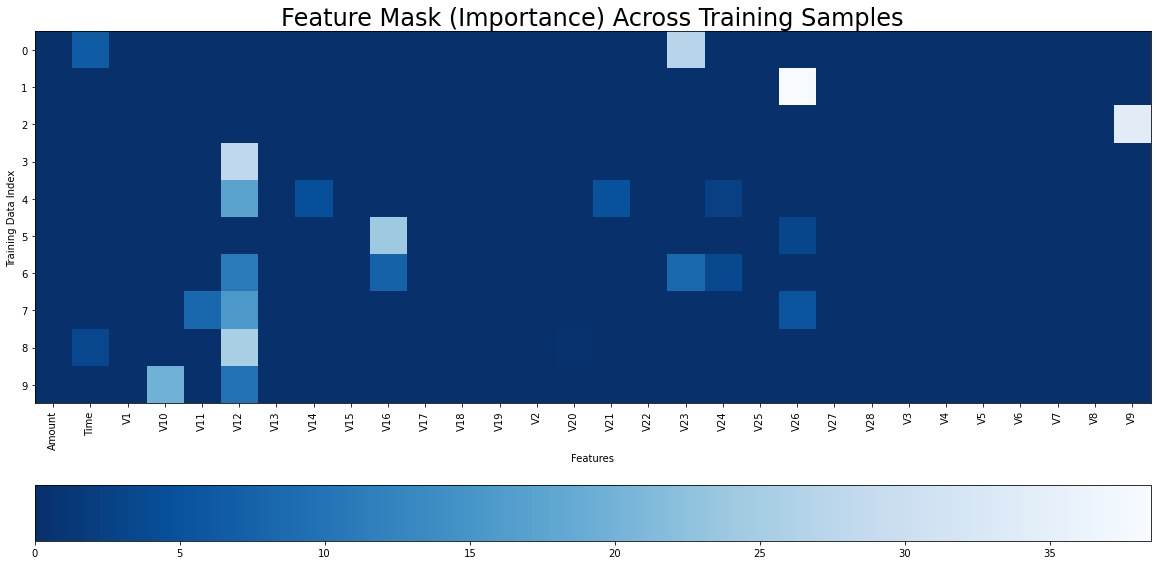

In [535]:
plt.figure(figsize = (20, 10))
plt.imshow(masks, cmap = "Blues_r")
plt.colorbar(location = 'bottom', orientation = 'horizontal')
plt.title(label = 'Feature Mask (Importance) Across Training Samples', fontsize = 24)
plt.xlabel('Features')
plt.ylabel('Training Data Index')
plt.xticks(range(masks.shape[1]), masks.columns, rotation = 'vertical')
plt.yticks(range(masks.shape[0]), masks.index)
plt.show()

### For A Large Set of Predictions

In [536]:
n = 1000
train = bq.query(
    query = f"""
        SELECT * EXCEPT(Time, {VAR_TARGET}, splits, {VAR_OMIT}),
            cast(Time as String) as Time
        FROM {BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}
        WHERE splits = 'TRAIN'
        LIMIT {n}
    """
).to_dataframe()
train = train.to_dict(orient='records')

In [537]:
def syncPredictions(batch_size = 10):
    predictions = []
    # a loop where each step request predictions for batch_size number of instances - in a single request
    for p in range(0, len(train), batch_size):
        instances = [json_format.ParseDict(example, Value()) for example in train[p:p+batch_size]]
        preds = endpoint.predict(instances = instances)
        predictions.extend(preds.predictions)
    return predictions

In [538]:
predictions = syncPredictions()

In [544]:
masks = [p['feature_importance'] for p in predictions]
masks = pd.DataFrame(masks)
masks = masks.reindex(sorted(masks.columns), axis = 1)

In [546]:
masks.head()

,Amount,Time,V1,V10,V11,V12,V13,V14,V15,V16,...,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
0,0.0,6.488339,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,38.462414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.144135
3,0.0,0.000000,0.0,0.0,0.0,28.137184,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,17.361950,0.0,4.542883,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [551]:
batch = 50
cols = 8

panels = -(-len(masks) // batch) # math.ceil(len(masks)/batch)
rows = panels // cols # math.floor(panels/cols)

fig = plt.figure(
    figsize = (
        masks.shape[1] * cols,
        batch * rows
    )
) 

gs = gridspec.GridSpec(
    nrows = rows, ncols = cols,
    wspace=0.0,
    hspace=0.0
) 

for r in range(rows):
    for c in range(cols):
        i = r*cols + c
        ax = plt.subplot(gs[r,c])
        ax.imshow(masks.iloc[i*batch : i*batch+batch], cmap = 'Blues_r')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
plt.tight_layout()
plt.show()

---
## Predictions And Metrics

### Batch Prediction Job

Send the full data source table with all three split level through a batch prediction job with Vertex AI Batch Predictions.

In [542]:
TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")
bqBatchJob = model.batch_predict(
    job_display_name = f'{SERIES}_{EXPERIMENT}_{TIMESTAMP}',
    #model_name = model.versioned_resource_name,
    labels = model.labels,
    instances_format = 'bigquery',
    predictions_format = 'bigquery',
    model_parameters = json_format.ParseDict({}, Value()),
    bigquery_source = f'bq://{BQ_PROJECT}.{BQ_DATASET}.{BQ_TABLE}',
    bigquery_destination_prefix = f'bq://{BQ_PROJECT}.{BQ_DATASET}',
    machine_type = DEPLOY_COMPUTE,
    accelerator_count = 0,
    starting_replica_count = 10,
    max_replica_count = 10,
    batch_size = 100,
    sync = False #if True the call will wait for the job to complete
)

Creating BatchPredictionJob
BatchPredictionJob created. Resource name: projects/1026793852137/locations/us-central1/batchPredictionJobs/2174068464770088960
To use this BatchPredictionJob in another session:
bpj = aiplatform.BatchPredictionJob('projects/1026793852137/locations/us-central1/batchPredictionJobs/2174068464770088960')
View Batch Prediction Job:
https://console.cloud.google.com/ai/platform/locations/us-central1/batch-predictions/2174068464770088960?project=1026793852137
BatchPredictionJob projects/1026793852137/locations/us-central1/batchPredictionJobs/2174068464770088960 current state:
JobState.JOB_STATE_RUNNING
BatchPredictionJob projects/1026793852137/locations/us-central1/batchPredictionJobs/2174068464770088960 current state:
JobState.JOB_STATE_RUNNING
BatchPredictionJob projects/1026793852137/locations/us-central1/batchPredictionJobs/2174068464770088960 current state:
JobState.JOB_STATE_RUNNING
BatchPredictionJob projects/1026793852137/locations/us-central1/batchPredicti

In [552]:
print(f'Review the Batch Prediction Job in the Console here:\nhttps://console.cloud.google.com/vertex-ai/locations/{REGION}/batch-predictions/{bqBatchJob.name}?project={PROJECT_ID}')

Review the Batch Prediction Job in the Console here:
https://console.cloud.google.com/vertex-ai/locations/us-central1/batch-predictions/2174068464770088960?project=statmike-mlops-349915


In [554]:
bqBatchJob.output_info

bigquery_output_dataset: "bq://statmike-mlops-349915.fraud"
bigquery_output_table: "predictions_2022_11_23T04_50_01_891Z_682"

In [566]:
bq.query(
    query = f"""
        SELECT * EXCEPT(pos1, scores), predicted_class.classes[offset(pos1)] as pred_Class
        FROM `{bqBatchJob.output_info.bigquery_output_dataset.replace('bq://', '')}.{bqBatchJob.output_info.bigquery_output_table}`,
        UNNEST(predicted_class.scores) as scores with offset pos1
        WHERE scores > 0.5
        LIMIT 5 
    """
).to_dataframe()

,Amount,Class,Time,V1,V10,V11,V12,V13,V14,V15,...,V4,V5,V6,V7,V8,V9,predicted_Class,splits,transaction_id,pred_Class
0,40.00,0,150582,2.030316,-0.082442,-0.626663,0.334458,0.102206,0.581071,0.779077,...,-0.061219,0.363673,-0.961094,0.400507,-0.335667,0.466443,"{'classes': ['0', '1'], 'scores': [0.999389648...",TEST,372f163a-1219-467b-8de3-a8461927e9bb,0
1,20.93,0,157296,-0.579837,-0.350299,-0.375199,-0.320060,0.144430,-1.279629,0.799103,...,-0.255781,0.998954,-1.244904,1.347747,-0.619056,0.222617,"{'classes': ['0', '1'], 'scores': [0.999511718...",TEST,9b6212ba-71c6-468f-a707-30d70e8a7a9a,0
2,24.00,0,41419,1.386640,0.655015,-0.379964,-1.062043,-0.688752,0.040320,0.878063,...,-0.636767,-1.157852,-1.102368,-0.544759,-0.184532,-0.670205,"{'classes': ['0', '1'], 'scores': [0.999877929...",TEST,48ff13dc-cfd3-42d0-8b47-f95b2e86b9d4,0
3,105.85,0,164124,-0.678253,1.625716,0.339514,-1.241159,0.025925,-2.334856,-0.055936,...,-1.642910,0.459616,0.557556,1.022580,-0.814631,-0.181954,"{'classes': ['0', '1'], 'scores': [0.999877929...",TEST,347b0718-3fe2-40d8-8893-87769221b4bb,0
4,4.39,0,57722,1.271066,-0.016405,-0.542392,0.235964,-0.223534,0.190574,-0.151663,...,0.261703,2.190409,3.605406,-0.444428,0.850198,0.172931,"{'classes': ['0', '1'], 'scores': [0.999877929...",TEST,c9cecfeb-84ed-49cd-a3b7-e4b0fb09d283,0


In [587]:
results = bq.query(
    query = f"""
        SELECT splits, Class, predicted_class.classes[offset(pos1)] as pred_Class, predicted_class.scores[offset(pos1)] as pred_score
        FROM `{bqBatchJob.output_info.bigquery_output_dataset.replace('bq://', '')}.{bqBatchJob.output_info.bigquery_output_table}`,
        UNNEST(predicted_class.scores) as scores with offset pos1
        WHERE scores > 0.5 
    """
).to_dataframe()

In [588]:
results.head()

,splits,Class,pred_Class,pred_score
0,TEST,0,0,0.999390
1,TEST,0,0,0.999512
2,TEST,0,0,0.999878
3,TEST,0,0,0.999878
4,TEST,0,0,0.999878


### Custom Metrics Calculations

#### Confusion Matrix

In [589]:
metrics.confusion_matrix(
    list(results[f'{VAR_TARGET}']),
    list(results[f'pred_{VAR_TARGET}'])
)

array([[284254,     61],
       [    84,    408]])

Text(0.5, 1.0, 'Overall (All Splits)')

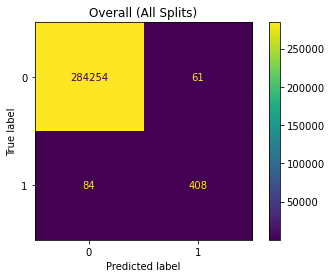

In [590]:
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix = metrics.confusion_matrix(
        list(results[f'{VAR_TARGET}']),
        list(results[f'pred_{VAR_TARGET}'])
    )
)
disp.plot()
disp.ax_.set_title('Overall (All Splits)')

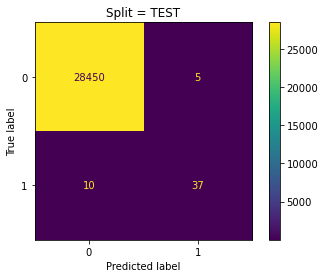

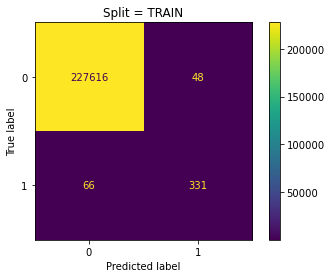

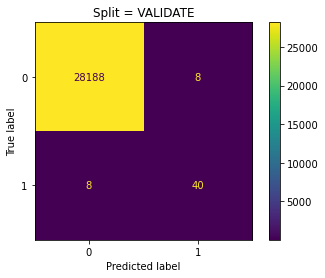

In [591]:
for split in results.splits.unique():
    splitresults = results.loc[results['splits'] == split]
    disp = metrics.ConfusionMatrixDisplay(
        confusion_matrix = metrics.confusion_matrix(
            list(splitresults[f'{VAR_TARGET}']),
            list(splitresults[f'pred_{VAR_TARGET}'])
        )
    )
    disp.plot()
    disp.ax_.set_title(f'Split = {split}')

#### Accuracy

In [592]:
for split in results.splits.unique():
    splitresults = results.loc[results['splits'] == split]
    accuracy = metrics.accuracy_score(
        list(splitresults[f'{VAR_TARGET}']),
        list(splitresults[f'pred_{VAR_TARGET}'])    
    )
    print(f'Accuracy for split = {split} is {accuracy}')

Accuracy for split = TEST is 0.999473721142376
Accuracy for split = TRAIN is 0.9995001337361495
Accuracy for split = VALIDATE is 0.9994335080016995


#### Classification Report

In [596]:
for split in results.splits.unique():
    splitresults = results.loc[results['splits'] == split]
    classreport = metrics.classification_report(
        list(splitresults[f'{VAR_TARGET}']),
        list(splitresults[f'pred_{VAR_TARGET}'])    
    )
    print(f'Classification Report for split = {split}:\n{classreport}')

Classification Report for split = TEST:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28455
           1       0.88      0.79      0.83        47

    accuracy                           1.00     28502
   macro avg       0.94      0.89      0.92     28502
weighted avg       1.00      1.00      1.00     28502

Classification Report for split = TRAIN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227664
           1       0.87      0.83      0.85       397

    accuracy                           1.00    228061
   macro avg       0.94      0.92      0.93    228061
weighted avg       1.00      1.00      1.00    228061

Classification Report for split = VALIDATE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28196
           1       0.83      0.83      0.83        48

    accuracy                           1.00     28244
   

---
## Remove Resources
see notebook "99 - Cleanup"